In [1]:
# import libraries
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import inspect
import csv
import src.tuning as t
import pickle

# access parent directory from notebooks directory
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir)

%load_ext autoreload
%autoreload 2
%matplotlib inline
%reload_ext autoreload

# Peer Nomination Network Data


In [18]:
# Instantiate grid search tuning class
tuning =  t.GridSearch()

/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:19: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.nominationPopulation = p.PeerNominatedDataPopulation('Peer-Nomination data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:114: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  super(GridSearch, self).__init__()
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/tuning.py:20: DtypeWarning: Columns (319,321,323,377,434,436,439,441,444,446,449,451,454,456,459,461,464,466,469,471,474,476,479,481,484,486,489,491) have mixed types.Specify dtype option on import or set low_memory=False.
  self.communicationPopulation = p.CommunicationDataPopulation('Communication data population', self.input_args)
/Users/davidblok/Work EUR/GitHub/ABM-PA/src/t


## 1. Grid search: crude (400 parameter combinations)

In [3]:
# specify parameter space for grid search
i_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])
t_seq = np.array([0.001, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1])


### 1.1. Run grid search simulations

In [4]:
result_error, result_errorY3, result_m_error, result_child, result_cl = tuning.execute(t_range=t_seq,
                                                                                       i_range=i_seq,
                                                                                       t=2000,
                                                                                       population_name='nomination')

# Save model output
file = open('../output/tuning/nom_output_error_revised_1.obj', 'wb')
pickle.dump(result_error, file)

file = open('../output/tuning/nom_output_errorY3_revised_1.obj', 'wb')
pickle.dump(result_errorY3, file)

file = open('../output/tuning/nom_output_m_error_revised_1.obj', 'wb')
pickle.dump(result_m_error, file)

file = open('../output/tuning/nom_output_child_revised_1.obj', 'wb')
pickle.dump(result_child, file)

file = open('../output/tuning/nom_output_cl_revised_1.obj', 'wb')
pickle.dump(result_cl, file)

thres_PA: 0.001 I_PA: 0.001 error: 1.4685746074584176 1.0493549913405635 0.024066999178524322 runtime: 25.862653970718384
thres_PA: 0.001 I_PA: 0.05 error: 16.950913240393653 12.777868441623445 1.0125574940733155 runtime: 25.875055074691772
thres_PA: 0.001 I_PA: 0.1 error: 20.201803924505334 15.31156681352217 1.258680882195002 runtime: 24.610125064849854
thres_PA: 0.001 I_PA: 0.15 error: 21.35094878486093 16.260869369733108 1.35396168706766 runtime: 24.122997045516968
thres_PA: 0.001 I_PA: 0.2 error: 21.786743815125817 16.55524300183734 1.3863523162233928 runtime: 23.721423149108887
thres_PA: 0.001 I_PA: 0.25 error: 22.147846711041176 16.89630002025164 1.4243562436328747 runtime: 23.885164976119995
thres_PA: 0.001 I_PA: 0.3 error: 1.3486021034288757e+89 1.3486021034288757e+89 3.0580546563013055e+86 runtime: 23.86245608329773
thres_PA: 0.001 I_PA: 0.35 error: 2.7251827247249225e+62 2.7251827247249225e+62 6.179552663775334e+59 runtime: 23.89847993850708
thres_PA: 0.001 I_PA: 0.4 error: 2

### 1.2 Sum of Squared Errors

Text(0.5, 105.0, 'I PA')

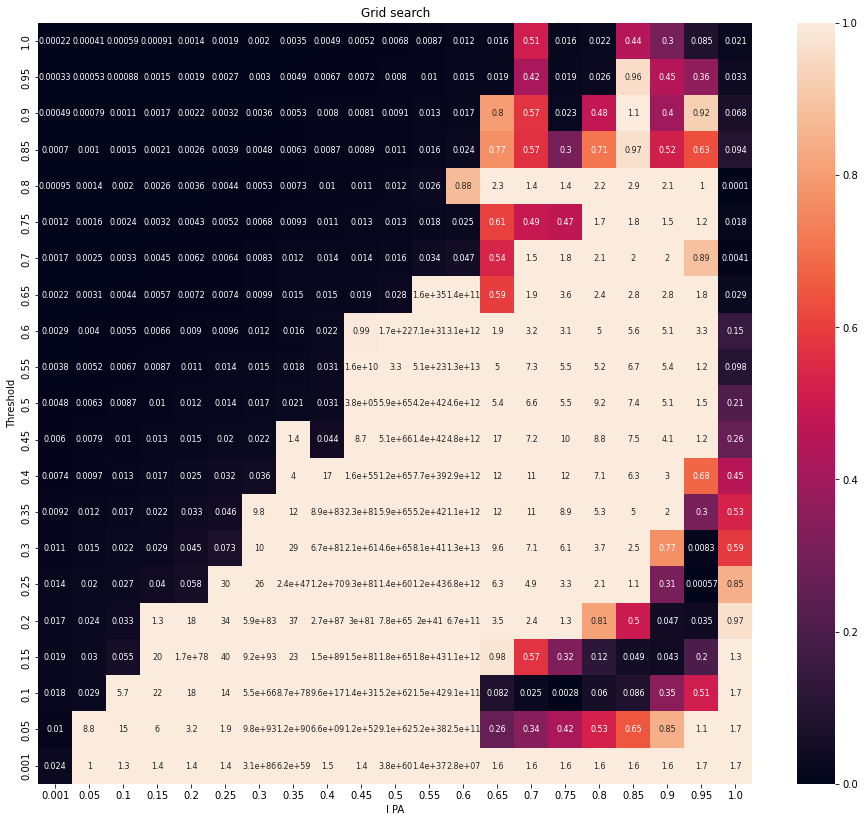

In [5]:
# SSE of all parameter combinations
errors_df = pd.DataFrame(result_m_error).pivot(index=0, columns=1,values=2)

# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df, annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [6]:
# Save plot
plt.savefig('../output/tuning/grid_search1_error_nomination_revised.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

### 1.3 Proportion participants changing PAL


In [7]:
# Checking proportion of participants changing PAL

proplist = []

for dat in result_child:
    datlist = []
    for key in dat:
        datlist.append(dat[key])

    res_ind = pd.concat(datlist, axis=1)
    dif = res_ind.iloc[1999] - res_ind.iloc[0]
    proplist.append(dif[dif != 0].count()/dif.count())

prop = pd.DataFrame(proplist)

result_prop = pd.DataFrame(result_error)

result_prop["prop"] = prop

prop_df = pd.DataFrame(result_prop).pivot(index=0, columns=1,values="prop")


Text(0.5, 105.0, 'I PA')

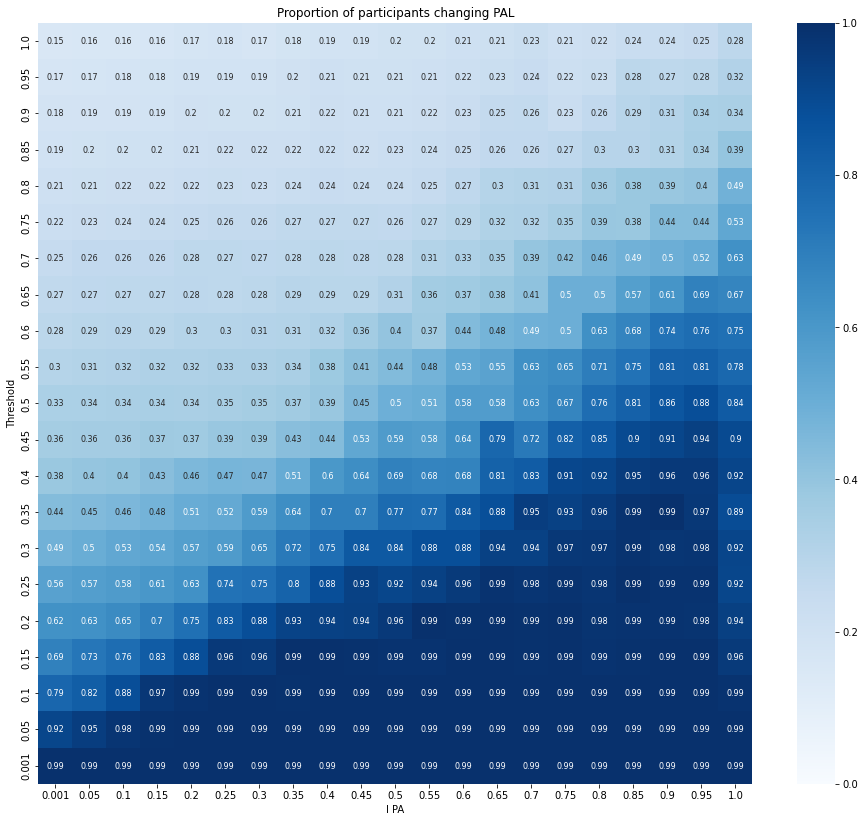

In [8]:
# plot heatmap of proportion changing PAL
plt.figure(figsize=((16,14)))
plt.title('Proportion of participants changing PAL')
sns.heatmap(prop_df, cmap="Blues", annot=True, annot_kws={"size": 8}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')


In [9]:
# Save plot
plt.savefig('../output/tuning/grid_search1_proportion_nomination_revised.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

# 2. Grid search: subspace

In [10]:
# specify parameter space for grid search
t_seq = np.arange(0.0025,0.101,0.0025)
i_seq = np.arange(0.0025,0.051,0.0025)

## 2.1 Run grid search simulations

In [11]:
result_error_2, result_errorY3_2, result_m_error_2, \
result_child2, result_cl2 = tuning.execute(t_range=t_seq,
                                           i_range=i_seq,
                                           t=2000,
                                           population_name='nomination')

# Save model output to object
file = open('../output/tuning/nom_output_error_revised_2.obj', 'wb')
pickle.dump(result_error_2, file)

file = open('../output/tuning/nom_output_errorY3_revised_2.obj', 'wb')
pickle.dump(result_errorY3_2, file)

file = open('../output/tuning/nom_output_m_error_revised_2.obj', 'wb')
pickle.dump(result_m_error_2, file)

file = open('../output/tuning/nom_output_child_revised_2.obj', 'wb')
pickle.dump(result_child2, file)

file = open('../output/tuning/nom_output_cl_revised_2.obj', 'wb')
pickle.dump(result_cl2, file)

thres_PA: 0.0025 I_PA: 0.0025 error: 0.9573691155053092 0.6789043512603169 0.010255708906127871 runtime: 23.477436780929565
thres_PA: 0.0025 I_PA: 0.005 error: 240.9508466017359 220.5170575432089 12.305341155913437 runtime: 24.41816210746765
thres_PA: 0.0025 I_PA: 0.0075 error: 89.54607528217264 74.66259630049993 5.134296922696574 runtime: 23.81672215461731
thres_PA: 0.0025 I_PA: 0.01 error: 41.83515991075408 36.39490764066515 2.318228700452292 runtime: 24.128786325454712
thres_PA: 0.0025 I_PA: 0.0125 error: 16.078840455701936 14.475927871625188 0.7731952632327885 runtime: 23.690792322158813
thres_PA: 0.0025 I_PA: 0.015000000000000001 error: 6.760021569758776 6.056542390169625 0.26430989231037916 runtime: 23.653263807296753
thres_PA: 0.0025 I_PA: 0.017499999999999998 error: 3.886169473963334 3.5382323992639115 0.08217177449922028 runtime: 23.749438047409058
thres_PA: 0.0025 I_PA: 0.02 error: 2.000452065035466 1.5478740098372825 0.0010248500099793686 runtime: 23.86017680168152
thres_PA:

### 2.2 Results

In [12]:
# SSE of all parameter combinations
errors_df2 = pd.DataFrame(result_error_2).pivot(index=0, columns=1,values=2)
errors_df2

1,0.0025,0.0050,0.0075,0.0100,0.0125,0.0150,0.0175,0.0200,0.0225,0.0250,0.0275,0.0300,0.0325,0.0350,0.0375,0.0400,0.0425,0.0450,0.0475,0.0500
0,,,,,,,,,,,,,,,,,,,,
0.0025,0.957369,240.950847,89.546075,41.835160,16.078840,6.760022,3.886169,2.000452,2.183944,2.393445,3.344316,4.449026,5.314669,5.861819,6.972811,7.249576,8.008369,8.662579,9.188503,10.105691
0.0050,0.765756,126.771754,376.449892,260.030105,136.480330,83.510430,42.200278,29.698499,15.341083,11.679150,8.624811,6.155886,2.923361,2.389602,2.806293,1.698850,2.129590,2.710508,2.588590,2.990636
0.0075,0.654650,0.630667,0.603539,233.537333,272.095860,222.031373,133.888846,92.974924,66.905609,50.098394,33.556989,20.822728,19.081071,12.684876,8.919579,6.265461,6.208266,5.373179,3.345198,2.282871
0.0100,0.598601,0.578355,0.556454,116.708743,132.125696,325.572292,271.596963,203.945865,143.394780,113.371215,83.301903,64.077294,45.411526,34.278185,27.764767,22.571921,18.025746,17.196622,12.390928,9.215398
0.0125,0.546296,0.536692,0.518955,0.505883,0.473608,347.938894,343.966389,267.342456,278.833839,196.319125,142.171142,118.919660,94.335934,73.472379,59.681733,45.050713,44.488983,33.799238,26.853486,25.143801
0.0150,0.508746,0.503989,0.493464,0.486679,0.468113,113.927448,229.886905,256.894708,321.557869,247.751752,211.087373,202.492717,152.717292,131.395382,111.326838,80.937644,74.280269,63.141742,53.106664,49.231356
0.0175,0.485558,0.476187,0.460192,0.446337,0.448816,0.438430,344.919946,263.559752,360.165776,363.209119,274.094188,245.964182,218.454514,191.430952,126.301160,128.918870,126.271357,93.309760,77.855006,72.222401
0.0200,0.469231,0.462835,0.458785,0.445948,0.433866,0.451615,134.681754,302.072797,414.571161,412.874838,343.111794,315.945198,291.239386,246.787565,201.130208,219.247567,164.997436,132.924846,117.079029,105.841727
0.0225,0.450158,0.442281,0.441330,0.431297,0.420568,0.444065,0.429481,142.516753,118.675784,262.480669,403.869489,430.103116,360.050760,238.660325,252.093335,246.520412,221.272837,199.391875,157.487359,148.267007


Text(0.5, 105.0, 'I PA')

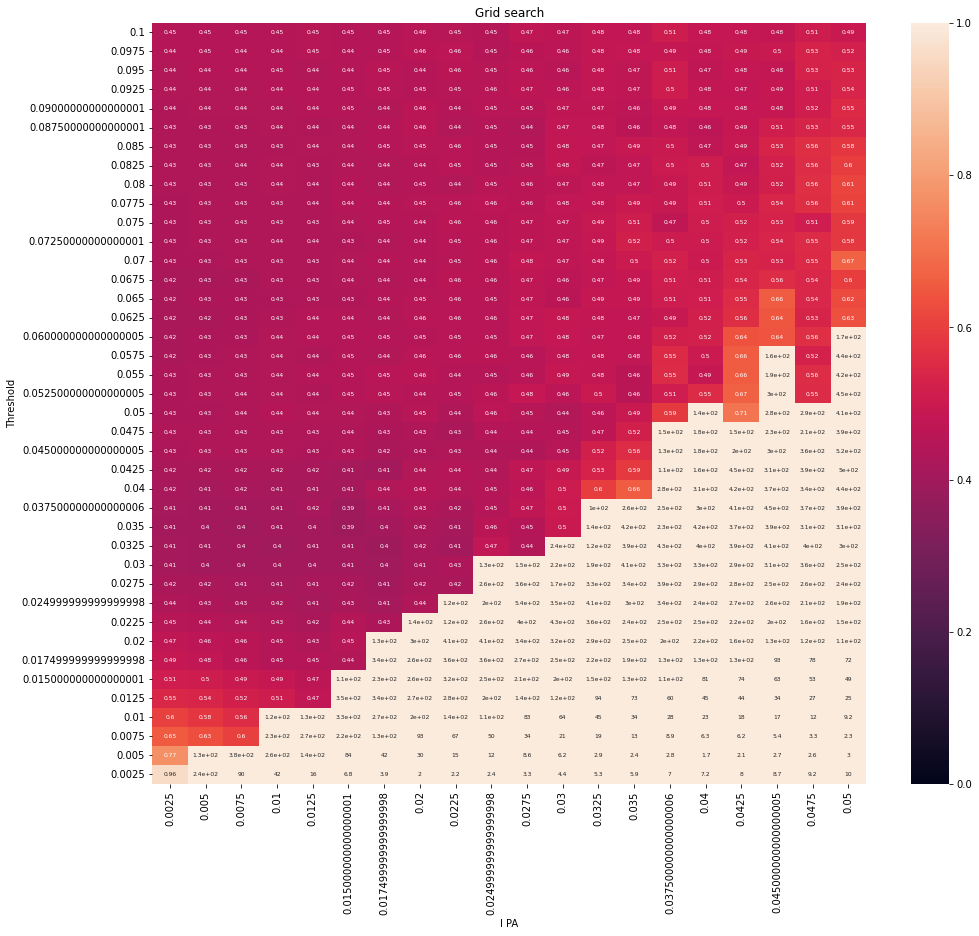

In [13]:
# plot heatmap of grid search
plt.figure(figsize=((16,14)))
plt.title('Grid search')
sns.heatmap(errors_df2, annot=True, annot_kws={"size": 6}, vmin=0, vmax=1).invert_yaxis()
plt.ylabel('Threshold')
plt.xlabel('I PA')

In [14]:
plt.savefig('../output/tuning/grid_search2_nomination_revised.eps', bbox_inches='tight', format='eps', dpi=1000)


<Figure size 432x288 with 0 Axes>

## 3. Select best fitting parameter combinations

In [19]:
sort_errors = result_error_2
opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]

# Save parameter combinations in csv
with open('../output/opt_pars_nomination_revised.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)

opt_pars

[(0.035, 0.015000000000000001, 0.39275934545195734),
 (0.037500000000000006, 0.015000000000000001, 0.39314032310113833),
 (0.0325, 0.017499999999999998, 0.39737864797183486),
 (0.03, 0.017499999999999998, 0.3995060227164263),
 (0.035, 0.0075, 0.39998911574826473),
 (0.0325, 0.01, 0.40211360309895866),
 (0.035, 0.0125, 0.4029833130645121),
 (0.0325, 0.0075, 0.40316170258840556),
 (0.035, 0.017499999999999998, 0.4035551990268619),
 (0.03, 0.0125, 0.404156900414331),
 (0.03, 0.0075, 0.40429484699146495),
 (0.03, 0.01, 0.4045078172838041),
 (0.035, 0.005, 0.4046810552272899),
 (0.03, 0.005, 0.40473670407383056),
 (0.0275, 0.017499999999999998, 0.4057129821532426),
 (0.03, 0.015000000000000001, 0.40632970494574516),
 (0.037500000000000006, 0.01, 0.40693770838788107),
 (0.0325, 0.005, 0.4071499290430832),
 (0.037500000000000006, 0.005, 0.4073601997636383),
 (0.035, 0.01, 0.40816757343896076),
 (0.037500000000000006, 0.0075, 0.40820399399063023),
 (0.035, 0.0025, 0.40847523578357403),
 (0.032

In [20]:
# Run with optimal params
result_error_3, result_errorY3_3, result_m_error_3,\
result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                              t=2000,
                                              population_name='nomination')

# Save model output to object
file = open('../output/tuning/nom_output_error_revised_3.obj', 'wb')
pickle.dump(result_error_3, file)

file = open('../output/tuning/nom_output_errorY3_revised_3.obj', 'wb')
pickle.dump(result_errorY3_3, file)

file = open('../output/tuning/nom_output_m_error_revised_3.obj', 'wb')
pickle.dump(result_m_error_3, file)

file = open('../output/tuning/nom_output_child_revised_3.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/nom_output_cl_revised_3.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.035 I_PA: 0.015000000000000001 error: 0.39275934545195734 0.2483623087612768 0.009663804982350782 runtime: 33.478245973587036
thres_PA: 0.037500000000000006 I_PA: 0.015000000000000001 error: 0.39314032310113833 0.25231348567677614 0.010526704568492896 runtime: 24.35419487953186
thres_PA: 0.0325 I_PA: 0.017499999999999998 error: 0.39737864797183486 0.2561511352109628 0.010700552788284403 runtime: 24.143338918685913
thres_PA: 0.03 I_PA: 0.017499999999999998 error: 0.3995060227164263 0.26512058865731136 0.010189404150094849 runtime: 24.31345510482788
thres_PA: 0.035 I_PA: 0.0075 error: 0.39998911574826473 0.24363396566781265 0.007510819821949216 runtime: 24.27532196044922
thres_PA: 0.0325 I_PA: 0.01 error: 0.40211360309895866 0.24665086916487663 0.007167522667794789 runtime: 24.156572341918945
thres_PA: 0.035 I_PA: 0.0125 error: 0.4029833130645121 0.2546907434419667 0.008828133934342543 runtime: 24.433809757232666
thres_PA: 0.0325 I_PA: 0.0075 error: 0.40316170258840556 0.2435

### 3.1 Select best fitting parameter combinations (overall mean)


In [21]:
sort_errors = result_m_error_2
opt_pars = tuple(sort_errors)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]

# Save parameter combinations in csv
with open('../output/opt_pars_m_nomination_revised.csv','w') as out:
    csv_out=csv.writer(out)
    csv_out.writerow(['threshold','ipa', 'error'])
    for row in opt_pars:
        csv_out.writerow(row)

opt_pars

[(0.0125, 0.005, 7.441040152387118e-08),
 (0.005, 0.04, 5.940499321809989e-06),
 (0.0125, 0.0025, 2.856580610043096e-05),
 (0.0125, 0.0075, 3.255179951007978e-05),
 (0.01, 0.0075, 8.834255443480318e-05),
 (0.015000000000000001, 0.0025, 8.987426494673741e-05),
 (0.015000000000000001, 0.005, 0.00022142053512221095),
 (0.01, 0.005, 0.0003165218078194658),
 (0.0125, 0.01, 0.00032814686147268233),
 (0.015000000000000001, 0.0075, 0.0003860589039185377),
 (0.017499999999999998, 0.0025, 0.000517549523332002),
 (0.01, 0.0025, 0.0005603398148811186),
 (0.0075, 0.0075, 0.0006369690768161252),
 (0.0125, 0.0125, 0.0006879413193891869),
 (0.017499999999999998, 0.005, 0.0007240259004708906),
 (0.015000000000000001, 0.01, 0.0008105504963709985),
 (0.0025, 0.02, 0.0010248500099793686),
 (0.0075, 0.005, 0.0011851660066750245),
 (0.017499999999999998, 0.0075, 0.001192246901163905),
 (0.02, 0.0025, 0.0011976458735180036),
 (0.017499999999999998, 0.01, 0.0015056310419490685),
 (0.02, 0.005, 0.0015800893306

In [22]:
# Run with optimal params
result_error_3, result_errorY3_3, result_m_error_3,\
result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                              t=2000,
                                              population_name='nomination')

# Save model output to object
file = open('../output/tuning/nom_output_error_revised_3_1.obj', 'wb')
pickle.dump(result_error_3, file)

file = open('../output/tuning/nom_output_errorY3_revised_3_1.obj', 'wb')
pickle.dump(result_errorY3_3, file)

file = open('../output/tuning/nom_output_m_error_revised_3_1.obj', 'wb')
pickle.dump(result_m_error_3, file)

file = open('../output/tuning/nom_output_child_revised_3_1.obj', 'wb')
pickle.dump(result_child3, file)

file = open('../output/tuning/nom_output_cl_revised_3_1.obj', 'wb')
pickle.dump(result_cl3, file)

thres_PA: 0.0125 I_PA: 0.005 error: 0.5366919194354175 0.3196475382157681 7.441040152387118e-08 runtime: 23.546143293380737
thres_PA: 0.005 I_PA: 0.04 error: 1.6988502898414128 0.9223786978857602 5.940499321809989e-06 runtime: 23.702608108520508
thres_PA: 0.0125 I_PA: 0.0025 error: 0.5462958888525963 0.3215166216587451 2.856580610043096e-05 runtime: 23.4996120929718
thres_PA: 0.0125 I_PA: 0.0075 error: 0.518955169104341 0.3117500281926905 3.255179951007978e-05 runtime: 25.349435806274414
thres_PA: 0.01 I_PA: 0.0075 error: 0.5564542283978271 0.3332490986074584 8.834255443480318e-05 runtime: 23.72105383872986
thres_PA: 0.015000000000000001 I_PA: 0.0025 error: 0.5087461673856429 0.2971038882387862 8.987426494673741e-05 runtime: 23.422898054122925
thres_PA: 0.015000000000000001 I_PA: 0.005 error: 0.5039887077500449 0.2959048481203276 0.00022142053512221095 runtime: 23.5482759475708
thres_PA: 0.01 I_PA: 0.005 error: 0.5783553827766439 0.34935971500489005 0.0003165218078194658 runtime: 23.29

# Visualization of runs for checking

In [ ]:
# Read parameter combinations selected.
file = open('../output/tuning/nom_output_error_revised_2.obj', 'rb')
com_error2 = pickle.load(file)

opt_pars = tuple(com_error2)
opt_pars = sorted(opt_pars, key=lambda x:x[2])
# select top 100 parameter combinations
opt_pars  = opt_pars[0:100]
opt_pars


In [ ]:
opt_pars = []
opt_pars.append((0.01, 0.001))
opt_pars.append((0.02, 0.001))
opt_pars.append((0.03, 0.001))
opt_pars.append((0.04, 0.001))
opt_pars.append((0.05, 0.001))

result_error3, result_error3, result_error3, result_child3, result_cl3 = tuning.execute_set(param_set=opt_pars,
                                                                              t=2000,
                                                                              population_name='nomination')
by_run_nom = []
for run in range(len(opt_pars)):
    by_run_nom.append(pd.DataFrame(result_cl3[run]).mean(axis=1))

avg_nom = pd.concat(by_run_nom, axis=1)

avg_nom.plot(figsize=((15, 10)))